# 📊 Happiness vs Income Analysis
This notebook explores the relationship between **Happiness Score** and **GDP per Capita** using global data from 111 countries.

We aim to understand if richer countries are necessarily happier, and highlight notable countries that deviate from the general trend.


In [1]:
# Load necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style='whitegrid')


In [3]:
# Load the dataset
df = pd.read_csv('happyscore_income.csv')

# Display basic info and preview
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                111 non-null    object 
 1   adjusted_satisfaction  111 non-null    float64
 2   avg_satisfaction       111 non-null    float64
 3   std_satisfaction       111 non-null    float64
 4   avg_income             111 non-null    float64
 5   median_income          111 non-null    float64
 6   income_inequality      111 non-null    float64
 7   region                 111 non-null    object 
 8   happyScore             111 non-null    float64
 9   GDP                    111 non-null    float64
 10  country.1              111 non-null    object 
dtypes: float64(8), object(3)
memory usage: 9.7+ KB


,country,adjusted_satisfaction,avg_satisfaction,std_satisfaction,avg_income,median_income,income_inequality,region,happyScore,GDP,country.1
0,Armenia,37.0,4.9,2.42,2096.76,1731.506667,31.445556,'Central and Eastern Europe',4.350,0.76821,Armenia
1,Angola,26.0,4.3,3.19,1448.88,1044.240000,42.720000,'Sub-Saharan Africa',4.033,0.75778,Angola
2,Argentina,60.0,7.1,1.91,7101.12,5109.400000,45.475556,'Latin America and Caribbean',6.574,1.05351,Argentina
3,Austria,59.0,7.2,2.11,19457.04,16879.620000,30.296250,'Western Europe',7.200,1.33723,Austria
4,Australia,65.0,7.6,1.80,19917.00,15846.060000,35.285000,'Australia and New Zealand',7.284,1.33358,Australia


##  Data Preparation


In [4]:
# Sort the dataset by happiness score
sorted_df = df.sort_values(by='happyScore', ascending=False)


## 📈 Scatter Plot: Happiness vs GDP
- **X-axis**: GDP per Capita
- **Y-axis**: Happiness Score
- Points colored by Region
- Countries with happiness scores >7.5 or <4.5 are labeled


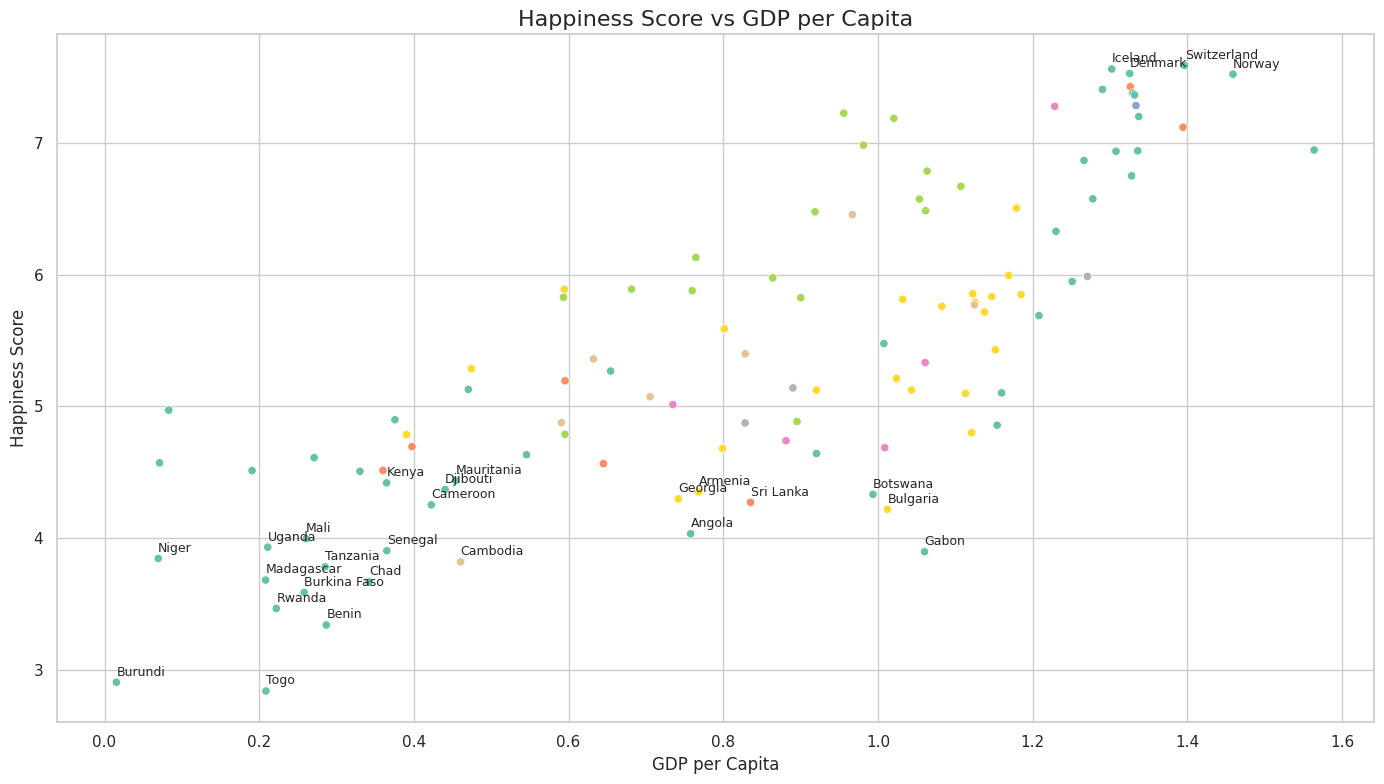

In [5]:
# Plotting
plt.figure(figsize=(14, 8))
ax = sns.scatterplot(x=sorted_df['GDP'], y=sorted_df['happyScore'],
                     hue=sorted_df['region'], palette='Set2', legend=False)

# Labels and Title
plt.xlabel('GDP per Capita', fontsize=12)
plt.ylabel('Happiness Score', fontsize=12)
plt.title('Happiness Score vs GDP per Capita', fontsize=16)

# Highlight interesting points
interesting_points = sorted_df[(sorted_df['happyScore'] > 7.5) | (sorted_df['happyScore'] < 4.5)]
for _, row in interesting_points.iterrows():
    plt.text(row['GDP'], row['happyScore'] + 0.05, row['country'], fontsize=9)

plt.tight_layout()
plt.show()


## Interpretation
### Why these columns?
- **GDP** is a measurable economic indicator.
- **Happiness Score** reflects a country's perceived well-being.
- Comparing them helps understand how economics relate to quality of life.

### Data Sorting and Filtering
- Data is sorted by `happyScore`.
- Highlighted countries: **happiness score > 7.5** or **< 4.5**.

### Interesting Observations
- High GDP countries (like **Norway**, **Switzerland**) tend to have high happiness.
- Some lower-GDP countries (e.g., **Costa Rica**) also rank high in happiness.
- Very low happiness scores often align with political/economic instability (**Syria**, **Burundi**).

_This confirms that while money matters, other factors like governance, freedom, and community are key to happiness._
